In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('D:\stranger things\dataset.csv')



In [38]:
print(df.info())
print(df.head())

print("\nСтатистика по числовым столбцам:")
print(df.describe())

print("\nУникальные значения в столбце 'event':")
print(df['event'].unique())

print("\nКоличество уникальных пользователей:")
print(df['randPAS_user_passport_id'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335436 entries, 0 to 4335435
Data columns (total 50 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ts                        object 
 1   counter_id                int64  
 2   ip                        object 
 3   page_view_order_number    int64  
 4   event_order_number        int64  
 5   event                     object 
 6   secs                      int64  
 7   url                       object 
 8   referer                   object 
 9   randPAS_user_passport_id  object 
 10  randPAS_user_agent_id     object 
 11  randPAS_trex_cid          object 
 12  randPAS_uma_media_cid     object 
 13  randPAS_session_id        object 
 14  is_new_page               int64  
 15  title                     object 
 16  node_id                   int64  
 17  main_rubric_id            int64  
 18  content_is_longread       int64  
 19  content_editor_id         int64  
 20  content_author_ids      

In [39]:
country_counts = df['geo_country_title_ru'].value_counts()
print('статистика неуникальных пользователей по странам')
for country, count in country_counts.items():
    print(f"{country}: {count}")


статистика неуникальных пользователей по странам
Россия: 676908
США: 81457
Казахстан: 14615
Беларусь: 13054
Украина: 8630
ФРГ: 8213
Франция: 5566
Узбекистан: 5096
Нидерланды: 4196
Латвия: 3349
Армения: 3047
Кыргызстан: 2908
Азербайджан: 2771
Молдова: 2744
Израиль: 2230
Польша: 2187
Таджикистан: 1933
Британия: 1913
Эстония: 1352
Финляндия: 1322
Грузия: 1185
Турция: 1136
Испания: 990
Япония: 923
Литва: 847
Швеция: 686
Италия: 676
Чехия: 572
Египет: 572
Канада: 534
Гонконг: 513
Австрия: 447
ОАЭ: 425
Болгария: 354
Сербия: 350
Республика Корея: 334
Кипр: 311
Бельгия: 282
Норвегия: 276
Австралия: 260
Швейцария: 247
Дания: 193
Португалия: 193
Таиланд: 191
Греция: 165
Словакия: 160
Панама: 147
Ирландия: 145
Сингапур: 128
Индонезия: 120
Саудовская Аравия: 114
Румыния: 111
Венгрия: 109
Монголия: 91
Вьетнам: 71
Туркменистан: 70
Куба: 68
Черногория: 68
Индия: 56
Словения: 44
Ливан: 41
Ливия: 37
Шри-Ланка: 36
Новая Зеландия: 36
ЮАР: 35
Бахрейн: 35
Сирия: 33
Китай: 33
Аргентина: 27
Сейшельские о-ва:

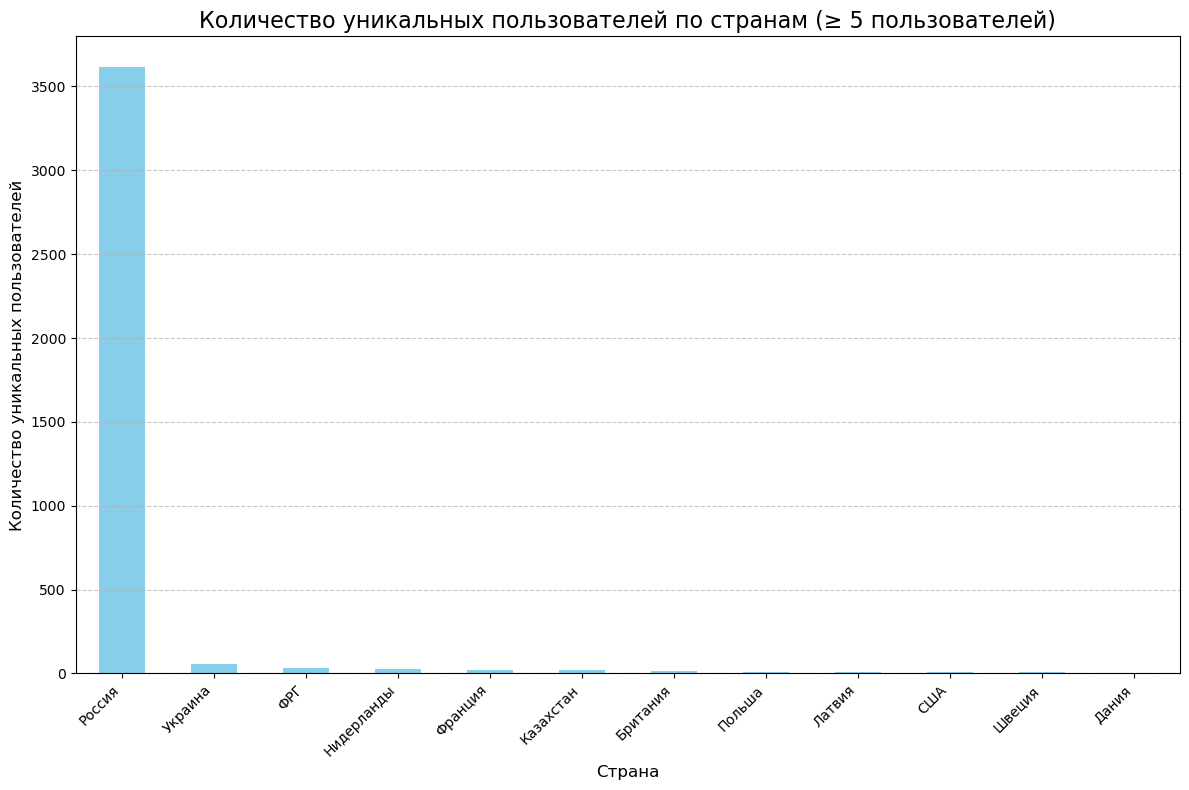

In [40]:
unique_users_by_country = df.groupby('geo_country_title_ru')['randPAS_user_passport_id'].nunique()
filtered_countries = unique_users_by_country[unique_users_by_country >= 5]
filtered_countries = filtered_countries.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
filtered_countries.plot(kind='bar', color='skyblue')

plt.title('Количество уникальных пользователей по странам (≥ 5 пользователей)', fontsize=16)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество уникальных пользователей', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


In [42]:
df['ts'] = pd.to_datetime(df['ts'])

df['month'] = df['ts'].dt.month  
df['hour'] = df['ts'].dt.hour 

print(df['month'].unique())
print(df['hour'].unique())

# выяснила что у нас один день - 7 декабря 2024, с 18 часов до 21 невключительно


[12]
[19 20 18]


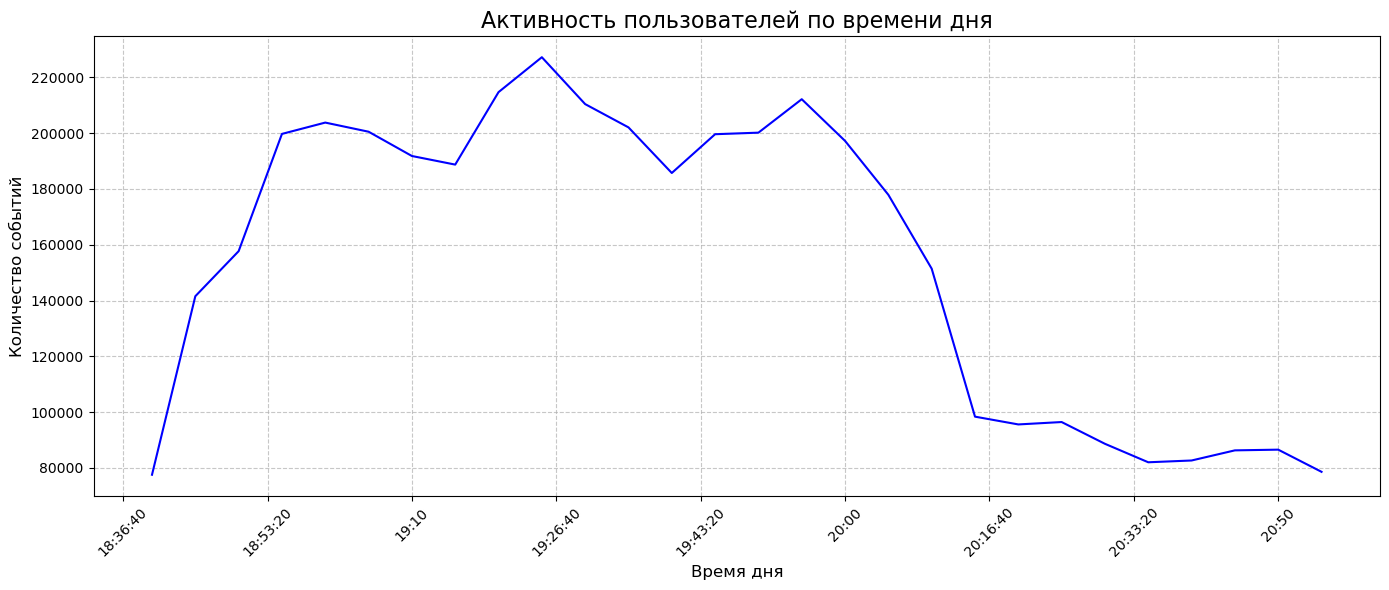

In [43]:
df['time_of_day'] = df['ts'].dt.time

df['time_of_day_rounded'] = df['ts'].dt.floor('5T').dt.time  
time_of_day_counts = df.groupby('time_of_day_rounded').size()

plt.figure(figsize=(14, 6))
time_of_day_counts.plot(kind='line', color='blue')

plt.title('Активность пользователей по времени дня', fontsize=16)
plt.xlabel('Время дня', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

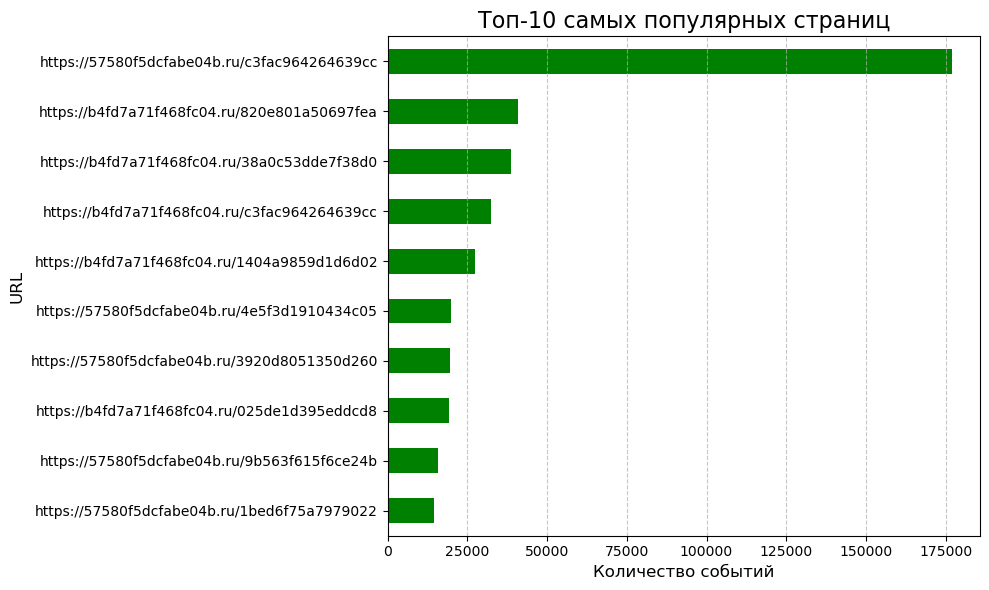

In [44]:
# а как понять что это за страницы......
top_pages = df['url'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_pages.sort_values().plot(kind='barh', color='green')
plt.title('Топ-10 самых популярных страниц', fontsize=16)
plt.xlabel('Количество событий', fontsize=12)
plt.ylabel('URL', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

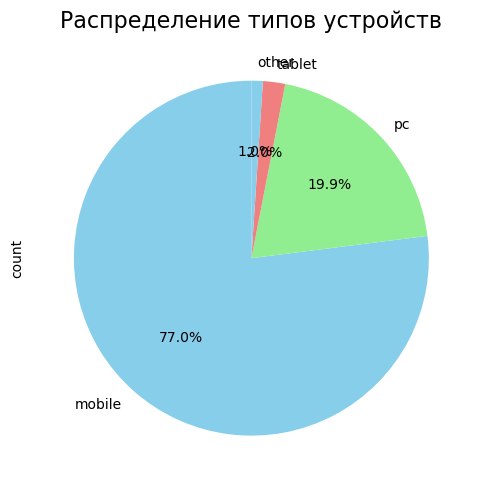

In [45]:
device_distribution = df['ua_device_type'].value_counts()

plt.figure(figsize=(5, 5))
device_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Распределение типов устройств', fontsize=16)
plt.tight_layout()
plt.show()

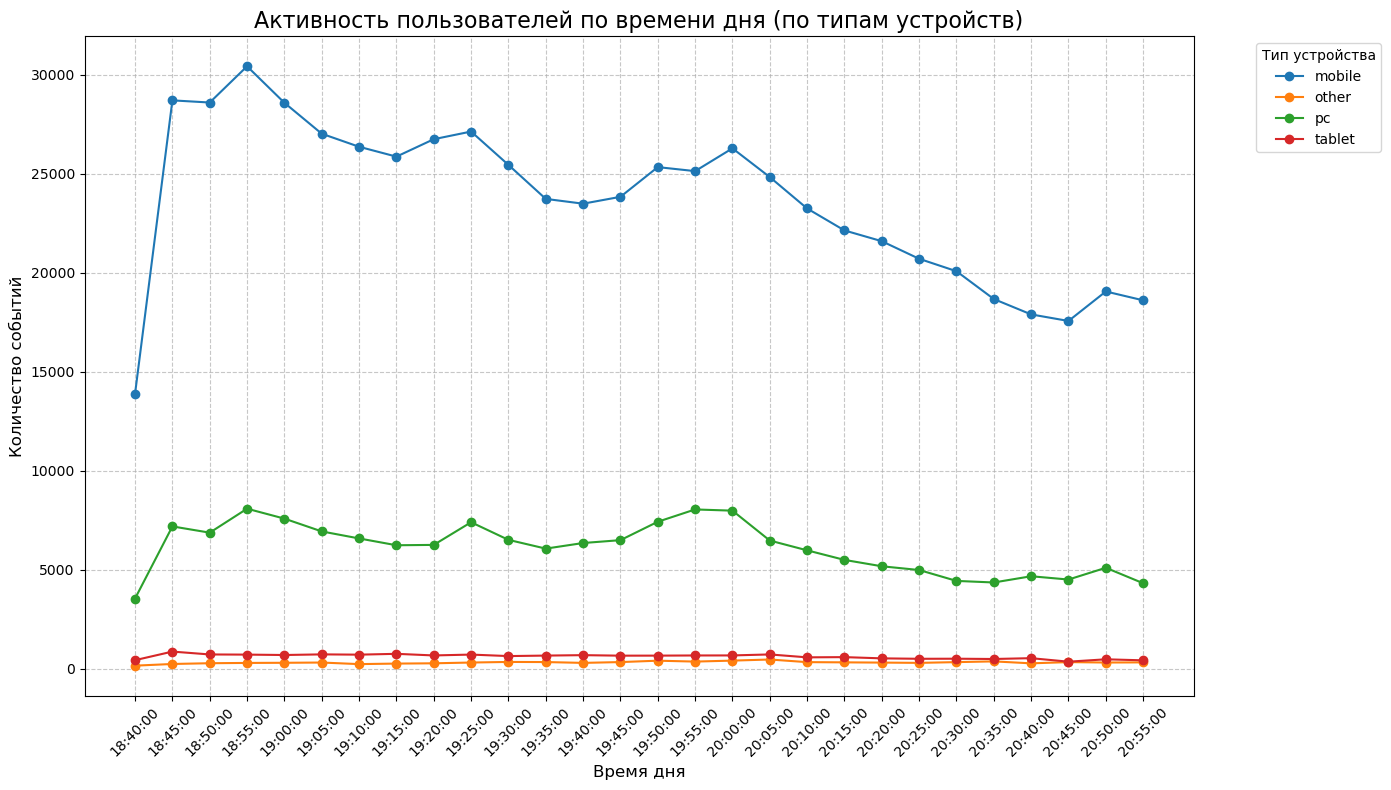

In [48]:
activity_by_device = df.groupby(['time_of_day_rounded', 'ua_device_type']).size().unstack(fill_value=0)

activity_by_device.index = activity_by_device.index.astype(str)

plt.figure(figsize=(14, 8))
for device in activity_by_device.columns:
    plt.plot(activity_by_device.index, activity_by_device[device], label=device, marker='o')

plt.title('Активность пользователей по времени дня (по типам устройств)', fontsize=16)
plt.xlabel('Время дня', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Тип устройства', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()
# в целом все ломаные имеют похожие тенденции, нет подозрительных всплесков
# возможно надо смотреть по секундам, а не по группам по 5 минут и тогда что-то будет видно

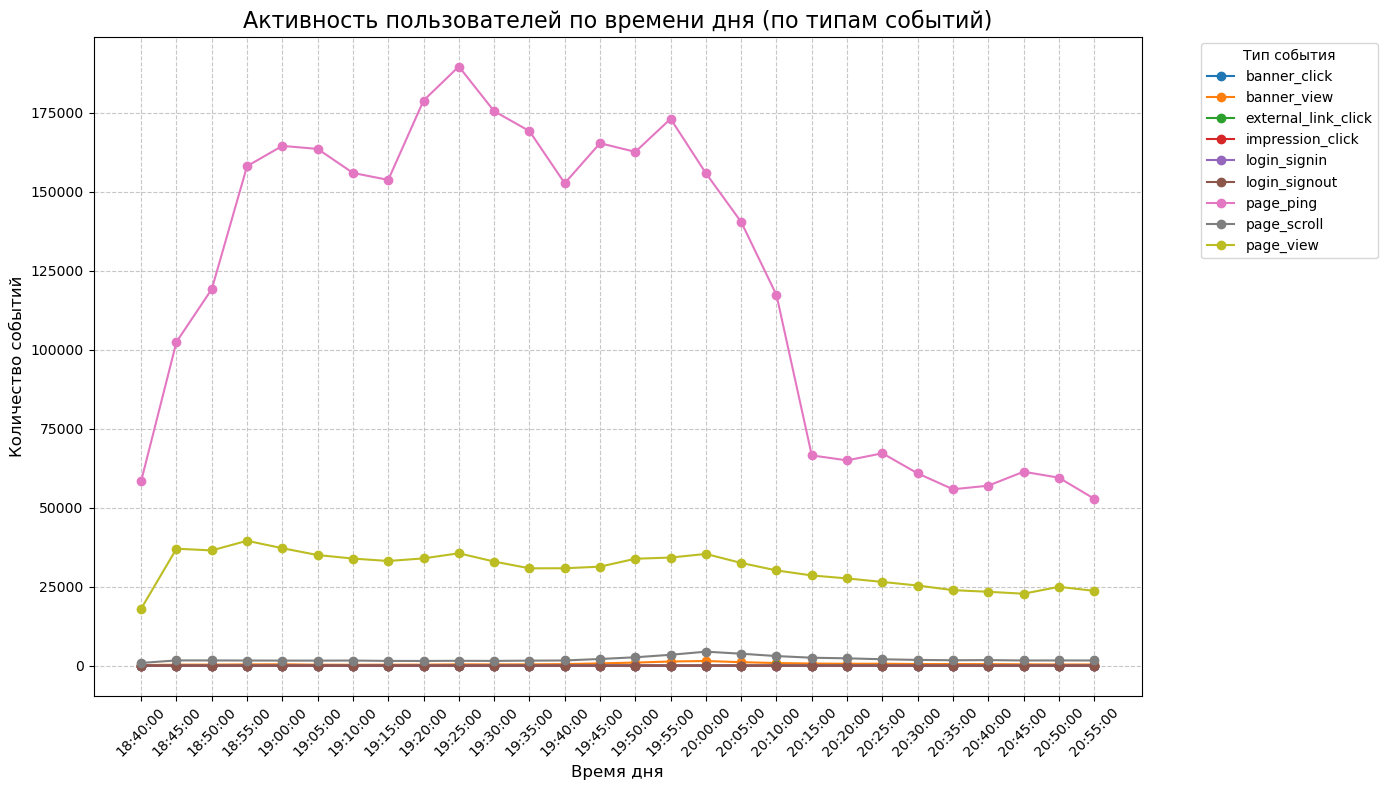

In [49]:
activity_by_event = df.groupby(['time_of_day_rounded', 'event']).size().unstack(fill_value=0)
activity_by_event.index = activity_by_event.index.astype(str)
plt.figure(figsize=(14, 8))
for event in activity_by_event.columns:
    plt.plot(activity_by_event.index, activity_by_event[event], label=event, marker='o')

plt.title('Активность пользователей по времени дня (по типам событий)', fontsize=16)
plt.xlabel('Время дня', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Тип события', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()
# тут как будто можно найти аномалии

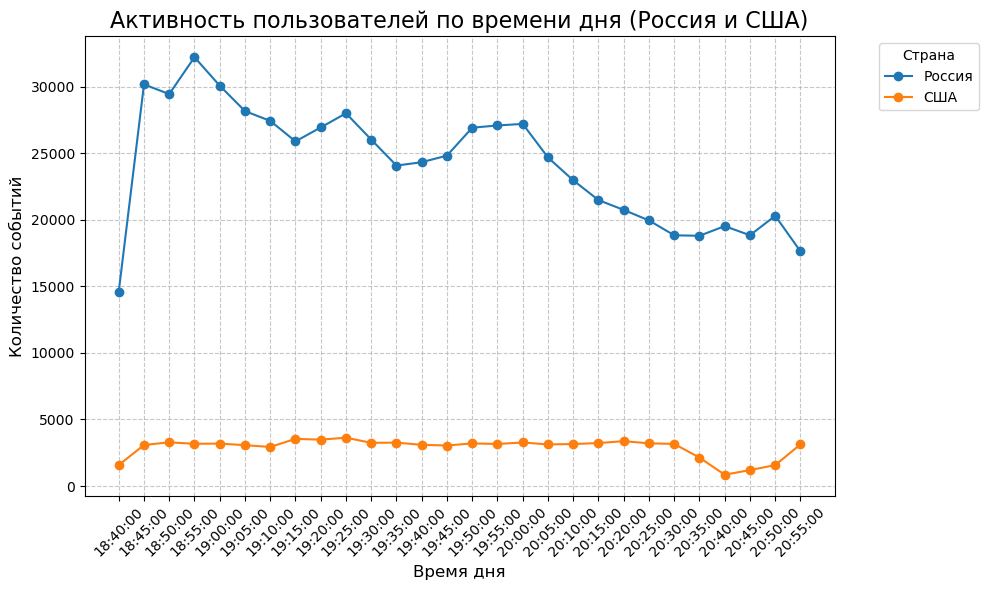

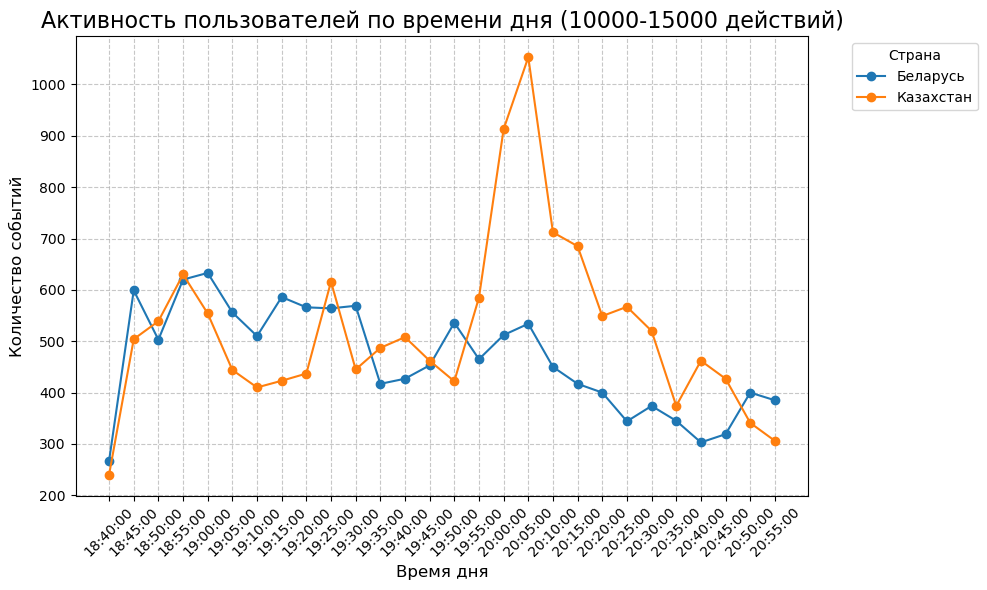

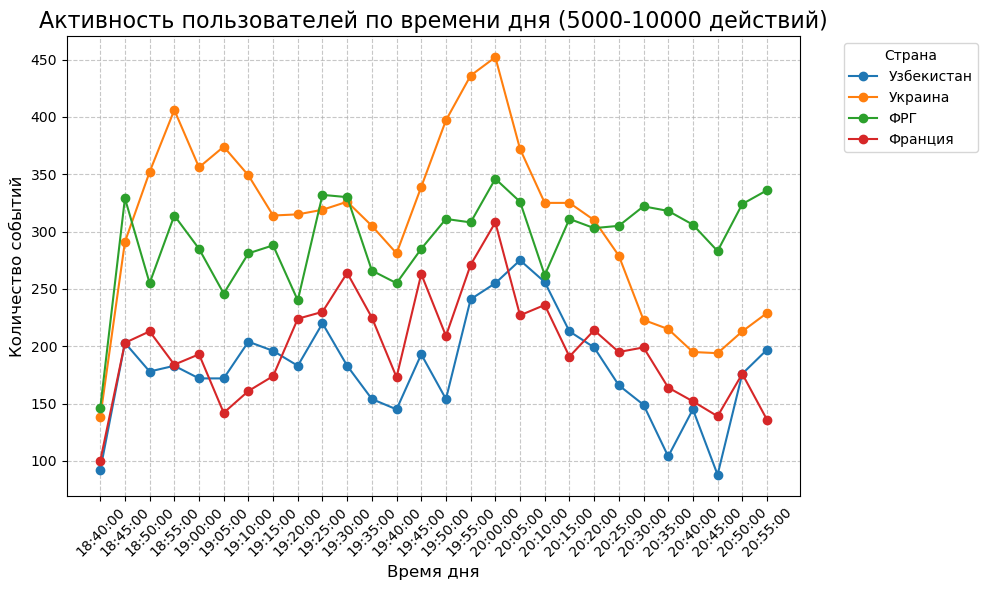

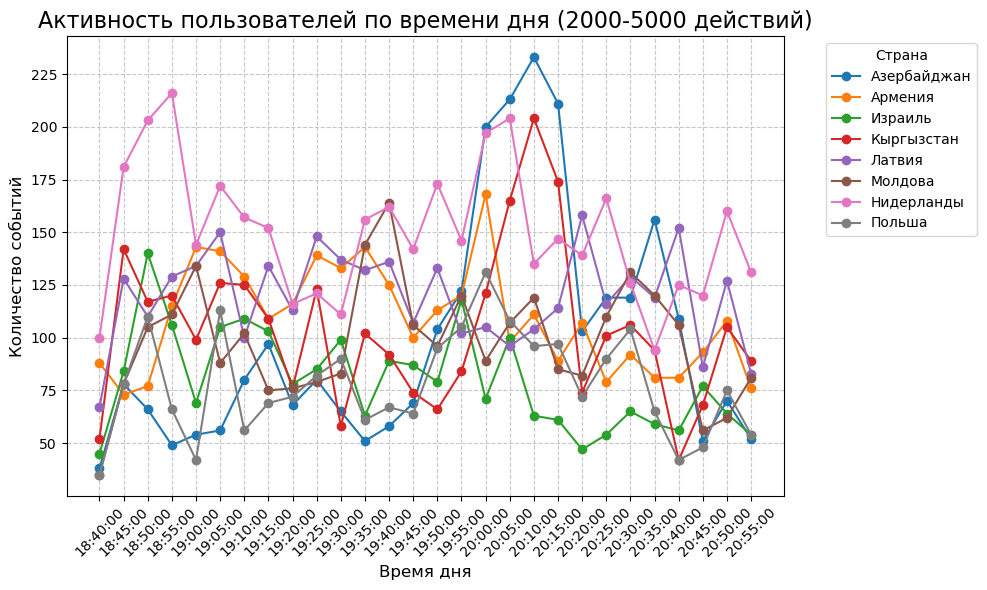

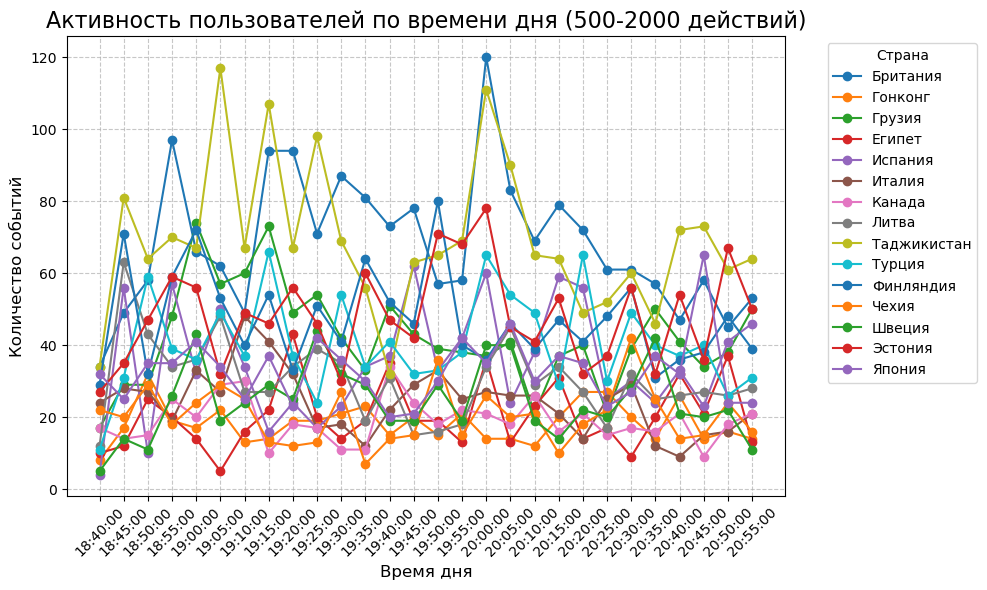

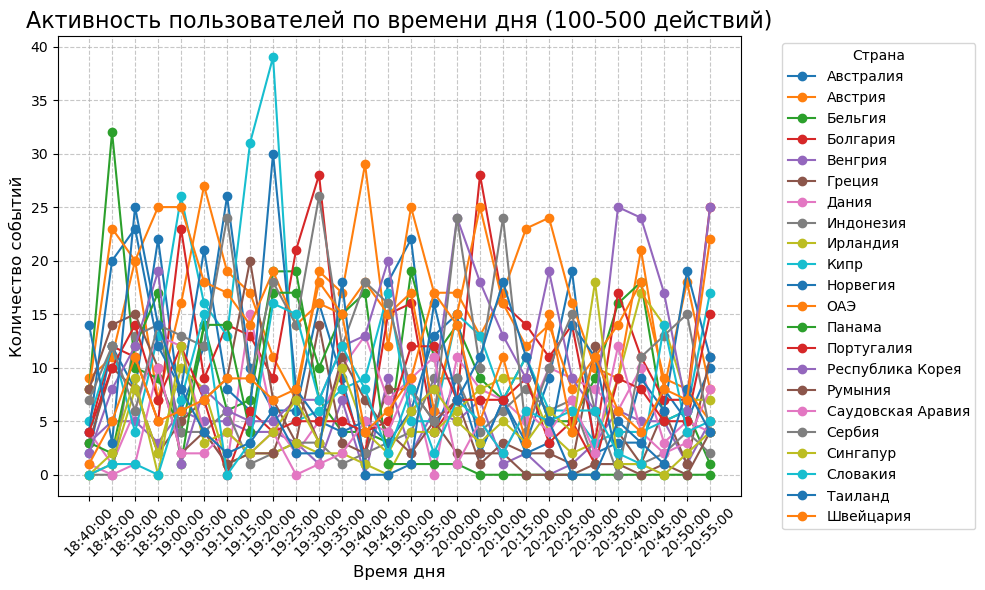

C:\Users\yatma\AppData\Local\Temp\ipykernel_2276\1048599683.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


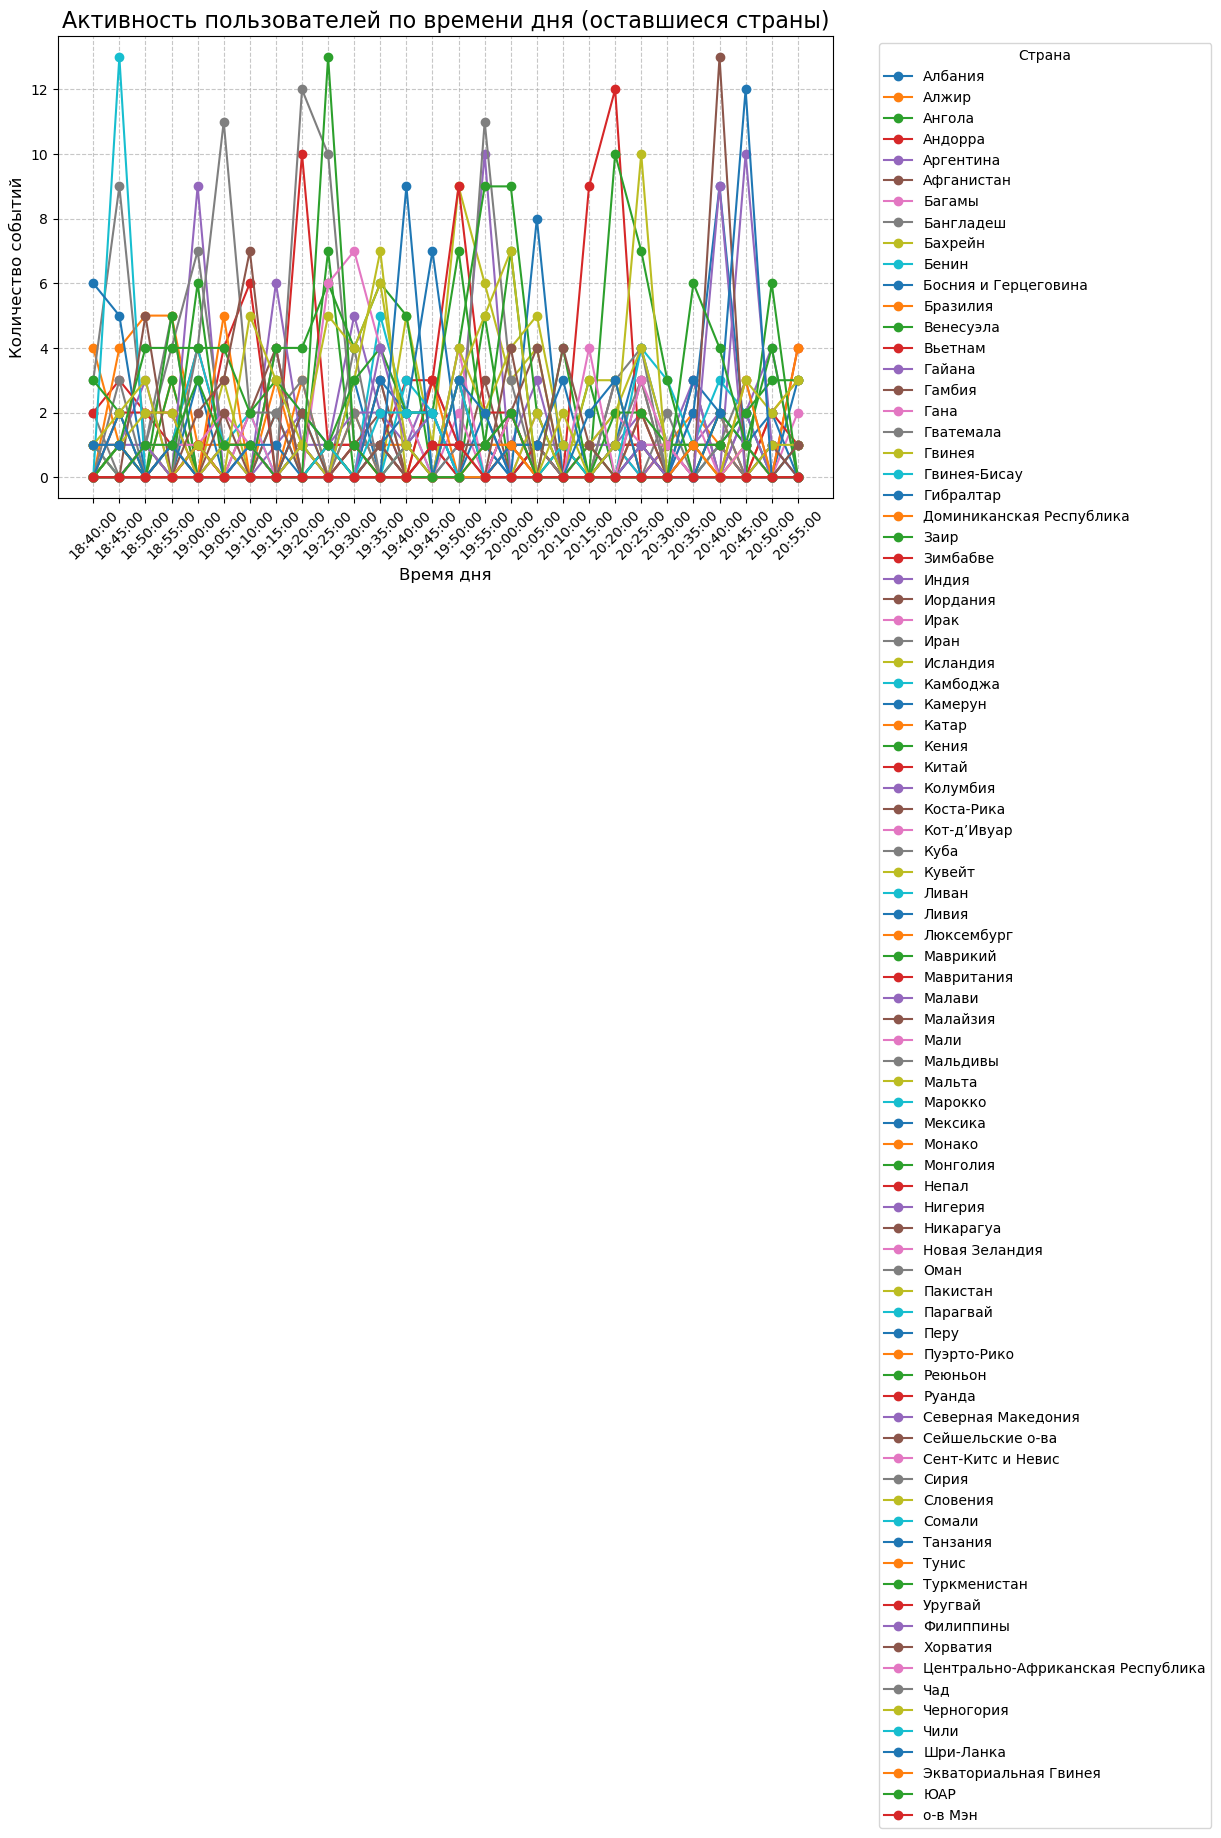

In [60]:
activity_by_country = df.groupby(['time_of_day_rounded', 'geo_country_title_ru']).size().unstack(fill_value=0)
activity_by_country.index = activity_by_country.index.astype(str)

total_actions_by_country = activity_by_country.sum()

russia_usa = ['Россия', 'США']
group_10000_15000 = total_actions_by_country[(total_actions_by_country >= 10000) & (total_actions_by_country <= 15000)].index
group_5000_10000 = total_actions_by_country[(total_actions_by_country >= 5000) & (total_actions_by_country < 10000)].index
group_2000_5000 = total_actions_by_country[(total_actions_by_country >= 2000) & (total_actions_by_country < 5000)].index
group_500_2000 = total_actions_by_country[(total_actions_by_country >= 500) & (total_actions_by_country < 2000)].index
group_100_500 = total_actions_by_country[(total_actions_by_country >= 100) & (total_actions_by_country < 500)].index
group_remaining = total_actions_by_country[total_actions_by_country < 100].index

def plot_activity(data, title):
    plt.figure(figsize=(10, 6))
    for country in data.columns:
        plt.plot(data.index, data[country], label=country, marker='o')
    plt.title(title, fontsize=16)
    plt.xlabel('Время дня', fontsize=12)
    plt.ylabel('Количество событий', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Страна', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_activity(activity_by_country[russia_usa], 'Активность пользователей по времени дня (Россия и США)')
plot_activity(activity_by_country[group_10000_15000], 'Активность пользователей по времени дня (10000-15000 действий)')
plot_activity(activity_by_country[group_5000_10000], 'Активность пользователей по времени дня (5000-10000 действий)')
plot_activity(activity_by_country[group_2000_5000], 'Активность пользователей по времени дня (2000-5000 действий)')
plot_activity(activity_by_country[group_500_2000], 'Активность пользователей по времени дня (500-2000 действий)')
plot_activity(activity_by_country[group_100_500], 'Активность пользователей по времени дня (100-500 действий)')
plot_activity(activity_by_country[group_remaining], 'Активность пользователей по времени дня (оставшиеся страны)')

In [ ]:
# последние графики очень непонятные, но если строить по несколько стран, 
# то будет лучше видно + уже сейчас видно подозрительно большое число пользователей из казахстана и украины около 20:00